# Fun Git stats

In [4]:
import sys
!{sys.executable} -m pip install -r requirements.txt -q
print("Done!")

Done!


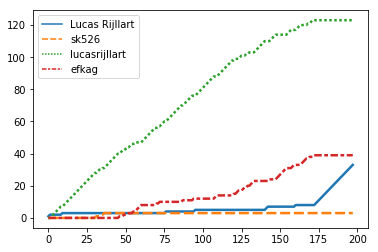

In [6]:
import pandas as pd
import seaborn as sns
from git import Repo

repo = Repo("~/hackathon/sleep-wake")

commit_list = repo.iter_commits("master")

authors = []
dates = []

for i in commit_list:
    authors.append(i.author.name)
    dates.append(i.authored_datetime)

authors_names = list(set(authors))


def set_values(authors,authors_names):
    values_over_time = []
    values = [0,0,0,0]
    for author in authors:
        index = authors_names.index(author)
        values[index]+=1
        values_over_time.append(values.copy())
    return values_over_time

vals = set_values(authors, authors_names)
dates = dates.reverse()
df = pd.DataFrame(vals, dates, columns=authors_names)
sns.lineplot(data=df, palette="tab10", linewidth=2.5)

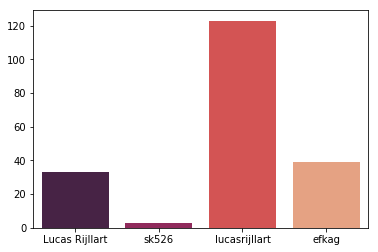

In [7]:
sns.barplot(x=authors_names, y=vals[-1], palette="rocket")

In [8]:
import pyphen
from IPython.display import HTML, display
import tabulate

repo = Repo("~/hackathon/sleep-wake")
py_phen = pyphen.Pyphen(lang="en")

def get_commit(repo_path="~/hackathon/sleep-wake"):
    commit_list = repo.iter_commits("master")
    data = []
    for commit in commit_list:
        commit_info = {
            "author": commit.author,
            "message": commit.message
        }
        data.append(commit_info)
    return data


def extract_line(sentence, remaining_syllables):
    line = []
    while remaining_syllables > 0:
        word = sentence.pop(0)  # get first word
        number_of_syllables = len(word.split("-"))  # check number of syllables
        remaining_syllables -= number_of_syllables  # reduce number of syllables remaining for line
        extra_syllables = number_of_syllables + remaining_syllables  # extra syllables in word
        syllables_to_use = word.split("-")[:extra_syllables]  # extract allowed number of syllables
        syllables_to_use = "".join(syllable for syllable in syllables_to_use)  # put syllables together
        syllables_to_put_back = word.split("-")[extra_syllables:]  # extract disallowed number of syllables
        syllables_to_put_back = "-".join(syllable for syllable in syllables_to_put_back)  # connect extra syllables
        if syllables_to_put_back:
            sentence.insert(0, syllables_to_put_back)  # put extra syllables back in front of sentence
        line.append(syllables_to_use)  # add allowed syllables to line
    # end of line
    list_to_string = " ".join(word for word in line)  # create sent
    remove_dashes = list_to_string#.replace("-", "")
    return sentence, remove_dashes


def extract_haiku(message):
    haiku = None
    syllable_sentence = []
    for word in message.split():
        syllable_sentence.append(py_phen.inserted(word))
    sentence = " ".join(syllable for syllable in syllable_sentence)  # make list of syllable words into sentence
    no_dashes = sentence.replace("-", " ")  # replace dashes as spaces
    syllable_list = no_dashes.split()
    count = len(no_dashes.split())  # count number of syllables
    if count >= 17:
        sentence, first_line = extract_line(syllable_sentence, 5)        
        sentence, second_line = extract_line(sentence, 7)
        sentence, third_line = extract_line(sentence, 5)
        haiku = f"{first_line}\n{second_line}\n{third_line}"
    return haiku


def display_shortest_commits():
    data = get_commit()
    commits = sorted(data, key=lambda commit: len(commit["message"]))

    table = [("Author", "Commit message", "Length (chars)")]
    for commit in commits[:5]:
        table.append([commit['author'], commit['message'], len(commit['message'])])

    display(HTML("<h1>Shortest commit messages</h1>"))
    display(HTML(tabulate.tabulate(table, tablefmt='html')))


def display_haikus():
    haikus = []
    for commit in get_commit():
        result = extract_haiku(commit["message"])
        if result:
            poem = {
                "author": commit["author"],
                "haiku": result
            }
            haikus.append(poem)


    html = "<hr><br><h1>Commit Haikus</h1></br>"
    for haiku in haikus[30:35]:
        html += f"<b><center><u>{str(haiku['author']).lower()}</u></center></b>"
        html += f"<p><center style='white-space: pre-line'>{haiku['haiku']}<br>*</center></p>"
          
    display(HTML(html))
    

display_shortest_commits()
display_haikus()

Author,Commit message,Length (chars)
Lucas Rijllart,Added images,13
Lucas Rijllart,Initial commit,15
Lucas Rijllart,Update README.md,16
Lucas Rijllart,Create README.md,16
efkag,Fitness function,17
